In [1]:
# 라이브러리 호출 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier 

In [2]:
# 데이터셋 읽기
df = pd.read_csv("housingdata.csv")

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:

# - CRIM - per capita crime rate by town 
# (**마을별 1인당 범죄율)**
# - ZN - proportion of residential land zoned for lots over 25,000 sq.ft. 
# (25,000평방피트 이상의 부지에 대해 구획된 주거용 토지의 비율.)
# - INDUS - proportion of non-retail business acres per town.
# - CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# - NOX - nitric oxides concentration (parts per 10 million)
# - RM - average number of rooms per dwelling
# (**주거당 평균 객실 수)**
# - AGE - proportion of owner-occupied units built prior to 1940
# (**1940년 이전에 지어진 소유주 점유의 비율)**
# - DIS - weighted distances to five Boston employment centres
# (**보스턴 고용 센터 5곳까지의 가중 거리)**
# - RAD - index of accessibility to radial highways
# (**방사형 고속도로 접근성 지수)**
# - TAX - full-value property-tax rate per $10,000
# (**$10,000당 전액 재산세율)**
# - PTRATIO - pupil-teacher ratio by town
# - B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# (마을별 흑인 비율입니다)
# - LSTAT - % lower status of the population
# - MEDV - Median value of owner-occupied homes in $1000's
# (**소유주가 거주하는 주택의 중간값 $1000$s)**|

In [5]:
# 데이터 불러오기
data = pd.read_csv("housingdata.csv")

# 결측치 확인
print(data.isnull().sum())

# 결측치 0으로 대체
data = data.fillna(0)

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [7]:
# 데이터 로드
data = load_breast_cancer()
X = data.data
y = data.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:

for column in df.select_dtypes(include=['float64', 'int64']):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # 이상치 조건
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치 탐지
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"컬럼 '{column}'의 이상치 개수: {len(outliers)}") # 이상치 개수 확인하기


컬럼 'CRIM'의 이상치 개수: 65
컬럼 'ZN'의 이상치 개수: 63
컬럼 'INDUS'의 이상치 개수: 0
컬럼 'CHAS'의 이상치 개수: 34
컬럼 'NOX'의 이상치 개수: 0
컬럼 'RM'의 이상치 개수: 30
컬럼 'AGE'의 이상치 개수: 0
컬럼 'DIS'의 이상치 개수: 5
컬럼 'RAD'의 이상치 개수: 0
컬럼 'TAX'의 이상치 개수: 0
컬럼 'PTRATIO'의 이상치 개수: 15
컬럼 'B'의 이상치 개수: 77
컬럼 'LSTAT'의 이상치 개수: 7
컬럼 'MEDV'의 이상치 개수: 40


In [9]:
# 이상치 제거

     # IQR 계산
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1                   
    
    # 이상치 조건
    lower_bound = Q1 - 1.14 * IQR
    upper_bound = Q3 + 1.14 * IQR
    
    # 이상치가 아닌 데이터만 남기기
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

     # 수치형 데이터 요약 
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df = remove_outliers_iqr(df, column)
print("이상치를 제거한 데이터:")
print(df.describe()) 

이상치를 제거한 데이터:
             CRIM          ZN       INDUS   CHAS         NOX          RM  \
count  147.000000  147.000000  147.000000  147.0  147.000000  147.000000   
mean     0.242749    4.683673    9.048571    0.0    0.506252    6.162293   
std      0.266372    9.572378    5.473687    0.0    0.057715    0.333604   
min      0.027310    0.000000    2.180000    0.0    0.409000    5.390000   
25%      0.075715    0.000000    5.190000    0.0    0.453000    5.926500   
50%      0.141500    0.000000    7.870000    0.0    0.510000    6.122000   
75%      0.281745    0.000000    9.900000    0.0    0.544000    6.417000   
max      1.354720   40.000000   25.650000    0.0    0.624000    7.079000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  147.000000  147.000000  147.000000  147.000000  147.000000  147.000000   
mean    61.666667    4.275784    4.551020  309.428571   19.002721  392.287279   
std     26.265638    1.663663    1.415103   67.634594    1

In [18]:
# 데이터와의 상관관계
data.corr() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


In [11]:
# 데이터 불러오기
data = pd.read_csv("housingdata.csv") 

# 불필요한 데이터열 삭제
data = data.drop(['ZN', 'B', 'RAD', 'DIS'], axis=1) 


In [12]:
#데이터 확인
data

,CRIM,INDUS,CHAS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,2.31,0.0,0.538,6.575,65.2,296,15.3,4.98,24.0
1,0.02731,7.07,0.0,0.469,6.421,78.9,242,17.8,9.14,21.6
2,0.02729,7.07,0.0,0.469,7.185,61.1,242,17.8,4.03,34.7
3,0.03237,2.18,0.0,0.458,6.998,45.8,222,18.7,2.94,33.4
4,0.06905,2.18,0.0,0.458,7.147,54.2,222,18.7,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.0,0.573,6.593,69.1,273,21.0,NaN,22.4
502,0.04527,11.93,0.0,0.573,6.120,76.7,273,21.0,9.08,20.6
503,0.06076,11.93,0.0,0.573,6.976,91.0,273,21.0,5.64,23.9
504,0.10959,11.93,0.0,0.573,6.794,89.3,273,21.0,6.48,22.0


In [13]:
# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.06410886247029457
R^2 Score: 0.7271016126223557


In [14]:
# 의사결정나무 모델 생성 및 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Accuracy: 0.9473684210526315
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
[[40  3]
 [ 3 68]]


In [15]:
# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # n_estimators: 트리의 개수
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
# 데이터 로드 (예시 데이터 사용)
data = pd.read_csv("housingdata.csv")
X = data.drop("MEDV", axis=1)
y = data["MEDV"]

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀 문제
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

MSE: 7.758682588235292
R-squared: 0.8942004318627175


C:\Users\jj359\AppData\Local\Temp\ipykernel_3880\1646831610.py:28: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jj359\AppData\Local\Temp\ipykernel_3880\1646831610.py:28: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jj359\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jj359\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


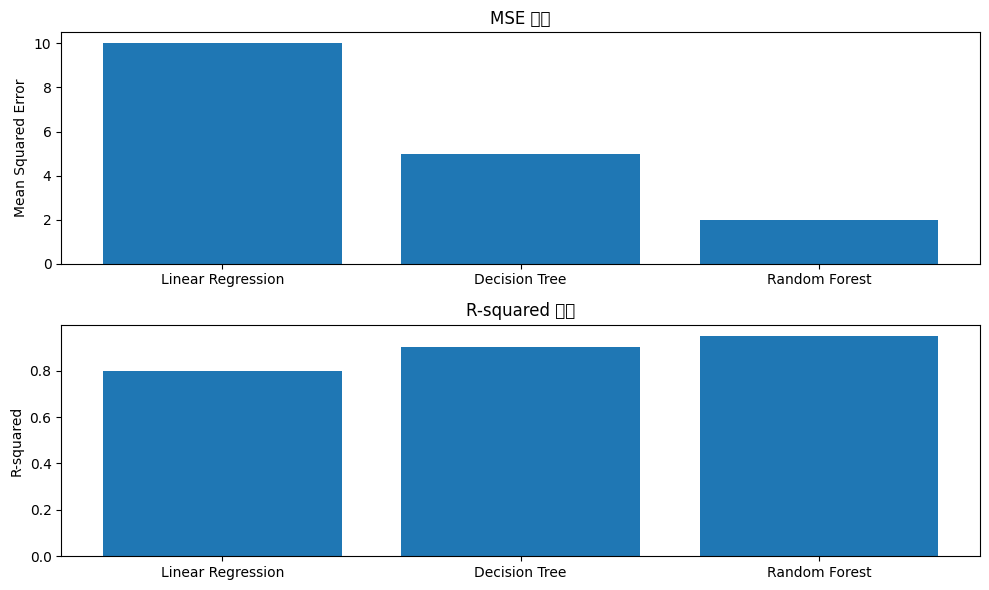

In [17]:
# 가상의 성능 지표 데이터 
mse_scores = [10, 5, 2]  # 선형 회귀, 의사결정나무, 랜덤 포레스트 순
r2_scores = [0.8, 0.9, 0.95]

# 모델 이름 설정
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']

# x축 값 설정
x = np.arange(len(model_names))

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))

# MSE 점수 비교
plt.subplot(2, 1, 1)
plt.bar(x, mse_scores)
plt.xticks(x, model_names)
plt.ylabel('Mean Squared Error')
plt.title('MSE 비교')

# R-squared 점수 비교
plt.subplot(2, 1, 2)
plt.bar(x, r2_scores)
plt.xticks(x, model_names)
plt.ylabel('R-squared')
plt.title('R-squared 비교')

plt.tight_layout()
plt.show()